# Human Activity Detection using Decision Trees

### Necessary imports

Imports being used in a large number of cells are listed here. Some cells may have more imports specific to them.

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import graphviz

/home/kishan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Generating training testing and validation data using UCI Dataset

In [2]:
# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("./Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING, TESTING, AND VALIDATION purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training,testing, and validation sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=4,stratify=y)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=4,stratify=y_test)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)
print("Validation data shape: ",X_val.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Training data shape:  (108, 500, 3)
Testing data shape:  (36, 500, 3)
Validation data shape:  (36, 500, 3)


### Printing X_train and y_train

In [3]:
X_train

array([[[ 1.00564   , -0.1732591 , -0.2299191 ],
        [ 1.006267  , -0.1727248 , -0.2516695 ],
        [ 1.004331  , -0.1783138 , -0.2447012 ],
        ...,
        [ 0.9963187 , -0.165975  , -0.2166365 ],
        [ 0.998345  , -0.1662256 , -0.2176124 ],
        [ 1.00105   , -0.1642913 , -0.2210956 ]],

       [[ 1.021875  , -0.07921287,  0.08373052],
        [ 1.024466  , -0.08395202,  0.07934183],
        [ 1.024289  , -0.09369397,  0.07537175],
        ...,
        [ 1.023544  , -0.07333879,  0.07219744],
        [ 1.023778  , -0.0755882 ,  0.0678795 ],
        [ 1.022446  , -0.07639688,  0.06301112]],

       [[ 0.5769551 , -0.3946061 , -0.2418967 ],
        [ 0.5891009 , -0.3449826 , -0.252776  ],
        [ 0.5914436 , -0.2663458 , -0.247756  ],
        ...,
        [ 0.622052  , -0.1729947 , -0.317891  ],
        [ 0.6328894 , -0.1800622 , -0.3112347 ],
        [ 0.6922841 , -0.2016215 , -0.323535  ]],

       ...,

       [[ 0.9756386 , -0.1592512 ,  0.2874114 ],
        [ 0

In [4]:
y_train

array([5, 5, 2, 3, 6, 4, 1, 5, 5, 4, 3, 1, 6, 5, 4, 1, 5, 1, 4, 6, 2, 4,
       6, 3, 6, 1, 1, 6, 6, 2, 5, 1, 4, 2, 6, 4, 3, 3, 6, 4, 2, 3, 6, 3,
       5, 5, 3, 1, 3, 1, 4, 6, 4, 5, 4, 4, 3, 4, 2, 4, 2, 1, 2, 5, 4, 2,
       5, 2, 3, 6, 1, 3, 2, 2, 1, 3, 6, 2, 5, 1, 3, 2, 4, 5, 4, 2, 1, 1,
       1, 3, 5, 5, 6, 1, 4, 6, 6, 5, 3, 3, 2, 6, 6, 3, 1, 5, 2, 2])

# Q1

The code below gives 3 rows with 6 columns each. Every column denotes an activity. The rows correspond to x,y and z accelerations, for the same person.

It is sufficient to use a single row (per activity) in X_train to get the data to make the plots.

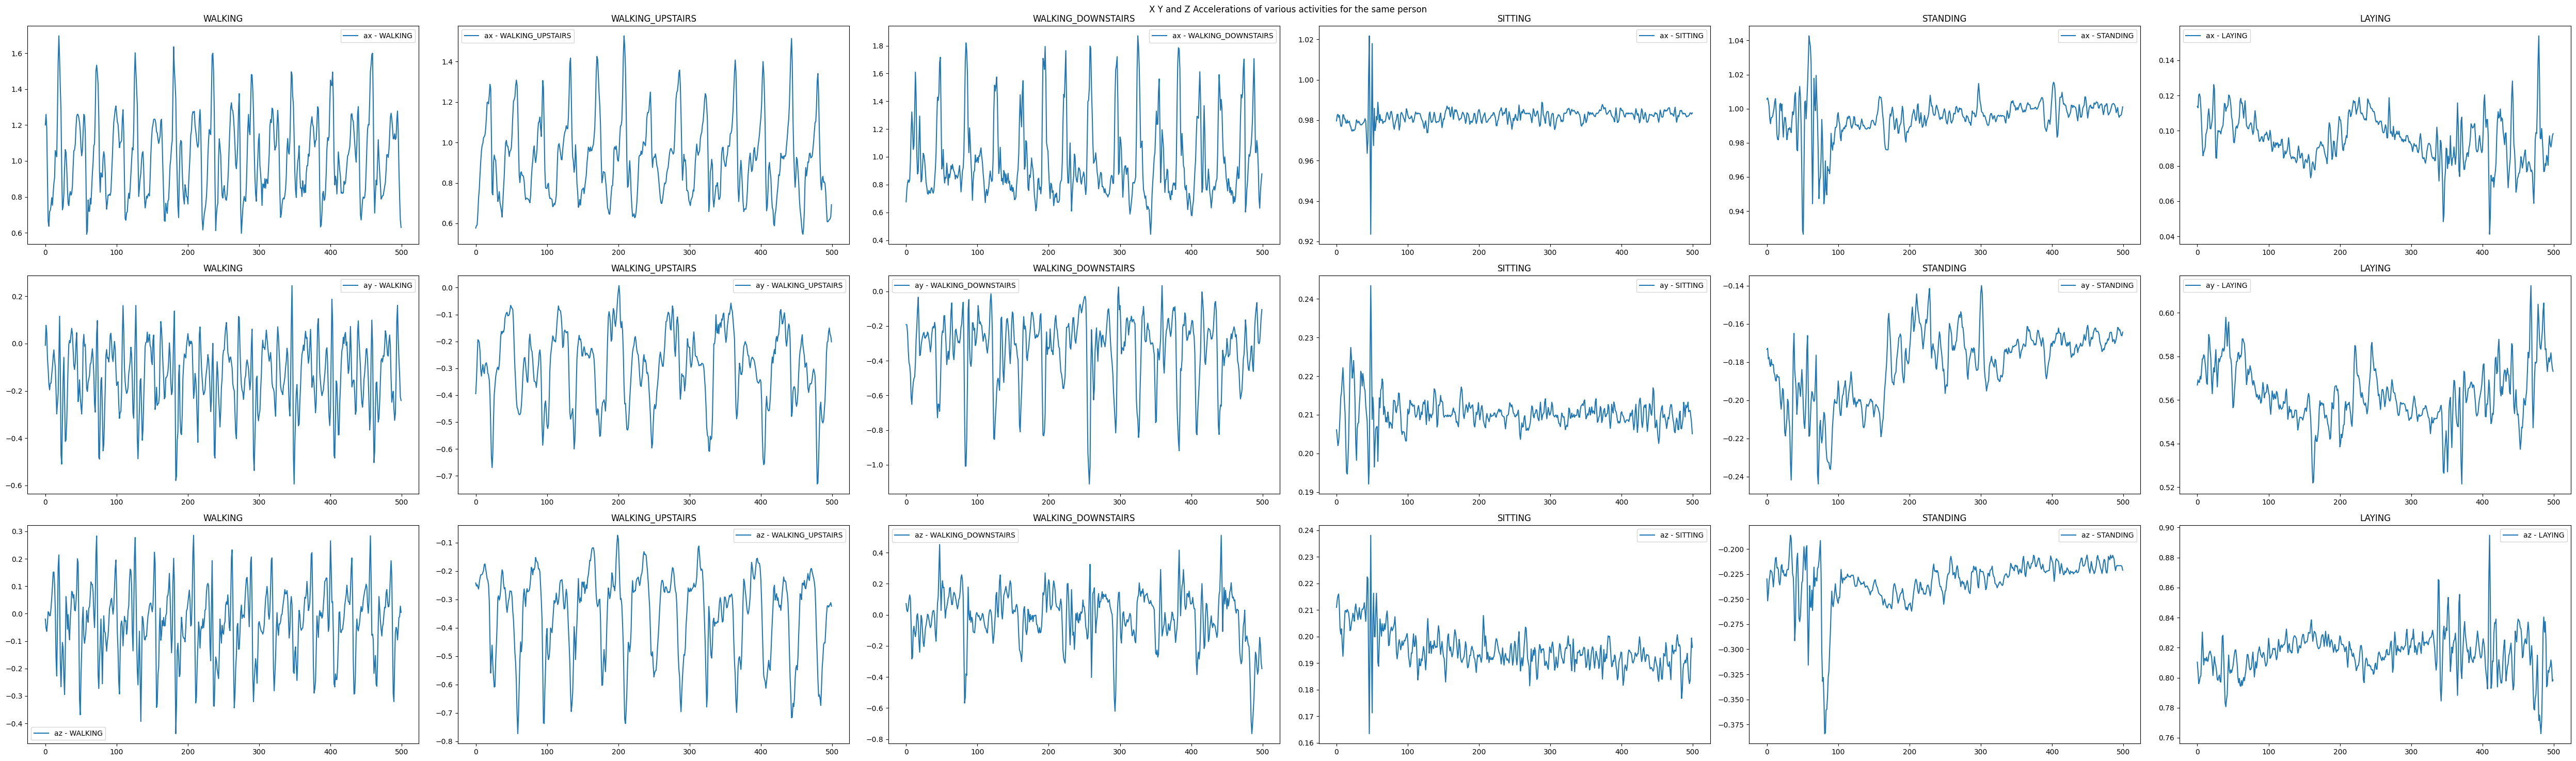

In [5]:


activities = [1, 2, 3, 4, 5, 6]
activity_dict = {1: 'WALKING',2: 'WALKING_UPSTAIRS',3: 'WALKING_DOWNSTAIRS',4: 'SITTING',5: 'STANDING',6: 'LAYING'}

fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(50, 15))
fig.suptitle('X Y and Z Accelerations of various activities for the same person')

for activity in activities:
    indices = np.where(y_train == activity)[0] # after taking [0], it is an np array
    index = indices[0] # Here, we have chosen the first index.
    acceleration_data = X_train[index]
    
    for j, axis in enumerate(['ax', 'ay', 'az']):
        row = j
        col = activity - 1
        axes[row, col].plot(acceleration_data[:, j], label=f'{axis} - {activity_dict[activity]}')
        axes[row, col].set_title(f'{activity_dict[activity]}')
        axes[row, col].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


We see that the waveforms for different activities differ. This difference is in terms of either the width or height of the peaks or the shape of the waveform. 

In case of walking, walking upstairs and and walking downstairs, there are several peaks in the waveform, which differ in width and height, hence, these can be differentiated from static activities like sitting, standing and laying where we don't have several large (high rising) peaks. The waveform for these is more or less smooth.

If we use a decision tree without featurizing the time series, the predictions will not be quite good. This is because it will consider individual samples of the waveform as separate features and will try to use their value to decide the split. However, this is not how we deal with time series data. If we shift the wave a bit, the value of the samples change, this might result in a totally different prediction. If featurization is done, like finding mean or variance for accx, accy and accz, then the decision tree will be able to distinguish between static and dynamic activities quite well. However, it might still have some difficulty in classifying between sitting and laying as they are both static activities and have similar waveforms.

# Q2

Finding linear acceleration

In [6]:
linear_acc_train = X_train[:,:,0]**2 + X_train[:,:,1]**2 + X_train[:,:,2]**2
linear_acc_val = X_val[:,:,0]**2 + X_val[:,:,1]**2 + X_val[:,:,2]**2
linear_acc_test = X_test[:,:,0]**2 + X_test[:,:,1]**2 + X_test[:,:,2]**2

Plotting linear acceleration of all activities (for the same person)

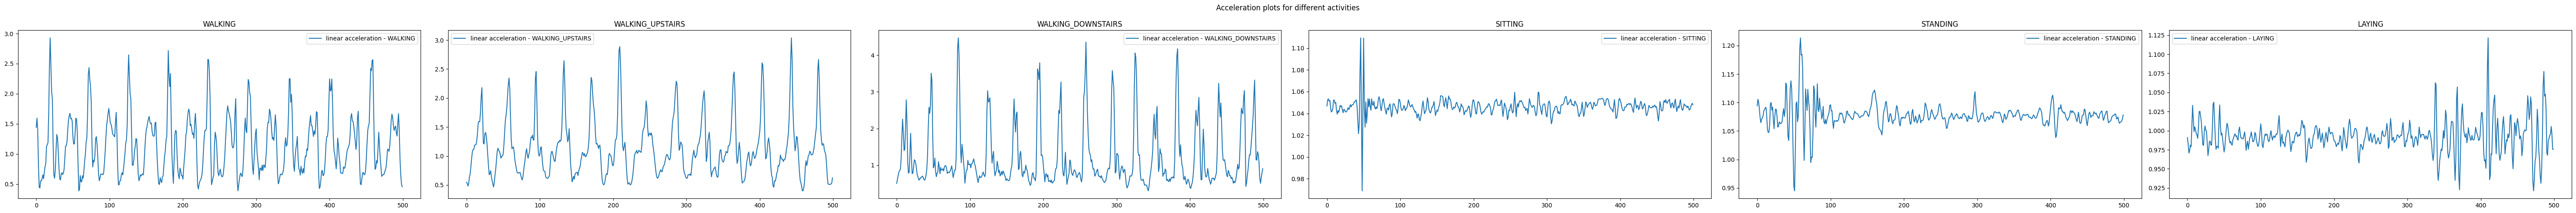

In [7]:
fig, axes = plt.subplots(ncols=6, figsize=(60, 5))
fig.suptitle('Acceleration plots for different activities')

for activity in activities:
    indices = np.where(y_train == activity)[0] # after taking [0], it is an np array
    index = indices[0] # Here, we have chosen the first index.
    acceleration_data = linear_acc_train[index]
    col = activity - 1
    axes[col].plot(acceleration_data, label=f'{"linear acceleration"} - {activity_dict[activity]}')
    axes[col].set_title(f'{activity_dict[activity]}')
    axes[col].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

We can visually distinguish between static and dynamic activities by looking at the plot of their linear acceleration. This is by seeing the waveform, the maximum and minimum values and the range in which the values lie. Thus, we can use simple conditional statements and hardcode the different conditions. So, using a machine learning model for this task is not an absolute necessity. However, if we train a decision tree on featurized data of linear acceleration, it will distinguish between static and dynamic activities quite well.

# Q3

We first demonstrate an incorrect way of doind this, then we build up to the correct approach.

### Training a Decision Tree using linear acceleration

This can be thought as real input of 500 dimensions. This means that for every entry, we have 500 features.

In [8]:
print("Shape of training data (linear acceleration):",linear_acc_train.shape)
print("Shape of testing data (linear acceleration):",linear_acc_test.shape)

Shape of training data (linear acceleration): (108, 500)
Shape of testing data (linear acceleration): (36, 500)


### Training the Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(linear_acc_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Testing our model on test data

In [10]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(linear_acc_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5555555555555556


### Plotting the confusion matrix

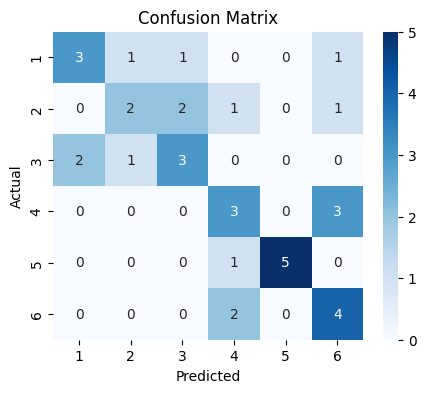

In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Visualizing the decision tree using Graphviz (Extra)

In [50]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dt, out_file=None, 
                           class_names=folders,
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png", cleanup=True)
graph.view("decision_tree")

'decision_tree.pdf'

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/kishan/snap/code/common/.cache/gio-modules/libgiolibproxy.so

(process:103488): Gtk-WARNING **: 23:21:12.740: Locale not supported by C library.
	Using the fallback 'C' locale.
/home/kishan/snap/code/common/.cache/gio-modules/libgiolibproxy.so: cannot open shared object file: Permission denied
Failed to load module: /home/kishan/snap/code/common/.cache/gio-modules/libgiolibproxy.so

(evince:103488): Gtk-WARNING **: 23:21:12.850: Theme parsing error: gtk-keys.css:1:0: Failed to import: Error opening file /snap/code/149/usr/share/themes/Default/gtk-3.0/gtk-keys.css: Permission denied
Gtk-Message: 23:21:12.851: Failed to load module "canberra-gtk-module"
Gtk-Message: 23:21:12.867: Failed to load module "canberra-gtk-module"


# Q4

### Training decision trees of varying depth:

In [13]:
models = []
accuracies = []
pred = []

for i,depth in enumerate(range(2,9)):
    models.append(DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=depth))

    models[i].fit(linear_acc_train, y_train)

    y_pred = models[i].predict(linear_acc_val)

    accuracy = accuracy_score(y_val, y_pred)
    pred.append(y_pred)
    accuracies.append(accuracy)

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/kishan/snap/code/common/.cache/gio-modules/libgiolibproxy.so

(process:5334): Gtk-WARNING **: 21:36:45.515: Locale not supported by C library.
	Using the fallback 'C' locale.
/home/kishan/snap/code/common/.cache/gio-modules/libgiolibproxy.so: cannot open shared object file: Permission denied
Failed to load module: /home/kishan/snap/code/common/.cache/gio-modules/libgiolibproxy.so

(evince:5334): Gtk-WARNING **: 21:36:45.556: Theme parsing error: gtk-keys.css:1:0: Failed to import: Error opening file /snap/code/149/usr/share/themes/Default/gtk-3.0/gtk-keys.css: Permission denied
Gtk-Message: 21:36:45.557: Failed to load module "canberra-gtk-module"
Gtk-Message: 21:36:45.558: Failed to load module "canberra-gtk-module"


In [14]:
models

[DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42),
 DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42),
 DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42),
 DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42),
 DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42),
 DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42),
 DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)]

In [15]:
for i,acc in enumerate(accuracies):
    print("Depth :",i+2,", Validation Accuracy:",accuracies[i])

Depth : 2 , Validation Accuracy: 0.3055555555555556
Depth : 3 , Validation Accuracy: 0.2777777777777778
Depth : 4 , Validation Accuracy: 0.3055555555555556
Depth : 5 , Validation Accuracy: 0.3611111111111111
Depth : 6 , Validation Accuracy: 0.3611111111111111
Depth : 7 , Validation Accuracy: 0.3611111111111111
Depth : 8 , Validation Accuracy: 0.3611111111111111


/home/kishan/snap/code/common/.cache/gio-modules/libdconfsettings.so: cannot open shared object file: Permission denied
Failed to load module: /home/kishan/snap/code/common/.cache/gio-modules/libdconfsettings.so

(evince:5334): Gtk-WARNING **: 21:36:45.817: Could not load a pixbuf from icon theme.
This may indicate that pixbuf loaders or the mime database could not be found.


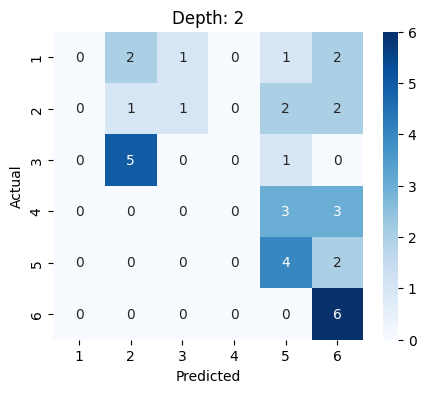

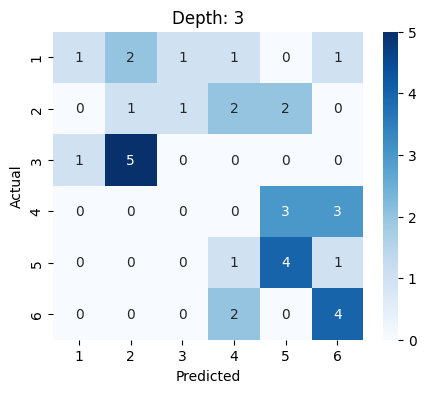

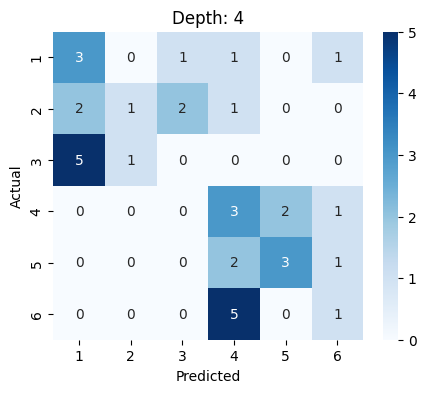

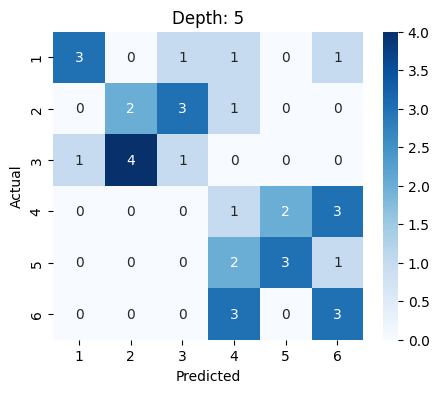

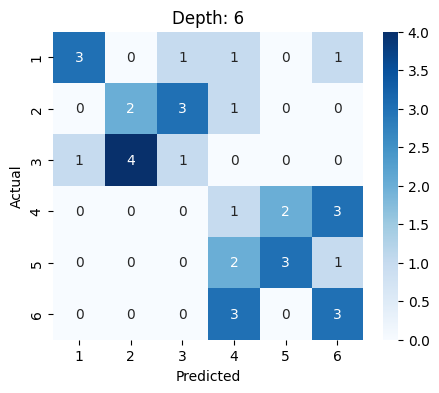

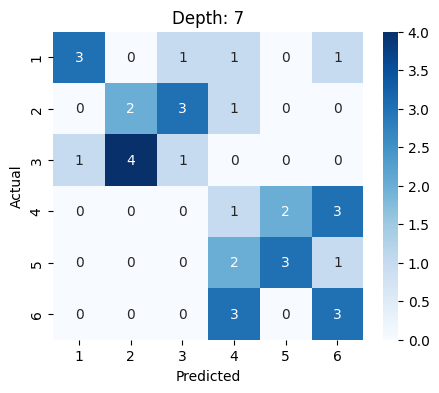

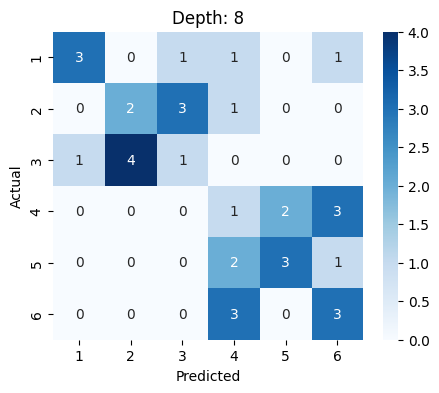

In [16]:
for i,y_pred in enumerate(pred):

    cm = confusion_matrix(y_val, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(1, 7), yticklabels=range(1, 7))
    plt.title(f'Depth: {i+2}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Text(0.5, 1.0, 'Decision Tree Depth vs Accuracy')

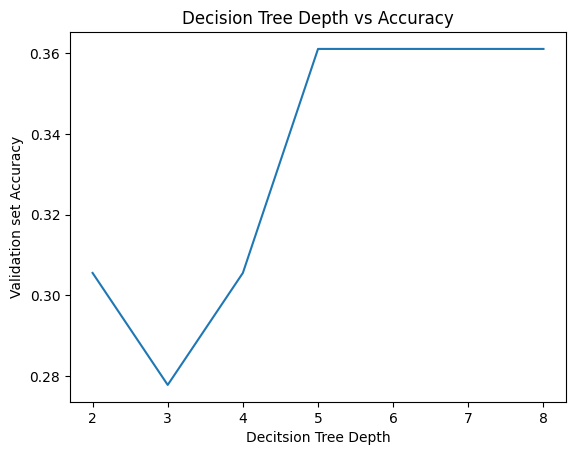

In [17]:
plt.plot(np.arange(2,9),accuracies)
plt.xlabel("Decitsion Tree Depth")
plt.ylabel("Validation set Accuracy")
plt.title("Decision Tree Depth vs Accuracy")

### Choosing the best model: Depth 5

Increasing the depth causes the accuracy of the model to increase (from depth 3 to 5), this is because the tree can learn more about the data as the number of splits increase with depth. This means that the bias decreases. After this, the accuracy on the validation set is constant. This might be because in depth 5, all the nodes reached the state of complete purity (only one class) or without any features to split. But as the number of features is 500, it is more likely that state of complete purity has been achieved. This can be verifyed by plotting the decision tree of depth 8 using graphviz, which contains only 6 levels (ie; it has depth 6), as in this level, all nodes are completely pure.

In [18]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(models[6], out_file=None, 
                           class_names=folders,
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png", cleanup=True)
graph.view("decision_tree")

'decision_tree.pdf'

### Testing the accuracy on Testset

In [19]:
y_pred = models[3].predict(linear_acc_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of our model:",accuracy)

Accuracy of our model: 0.5833333333333334


/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/kishan/snap/code/common/.cache/gio-modules/libgiolibproxy.so


# Key observation

The pdf of the decision tree showed that it was splitting on random points, like the split at the root node checked if the 463th sample was <=0.971. Hence, it is definitely incorrect to interpret time series data as 500 features.

Hence, we decided to utilize properties like mean, variance, max and min, to get 4 features for every 500 sample data.

# Extra: Featurization (without TSFEL)

### Making features: accx_mean, accx_variance, accy_mean, accy_variance, accz_mean and accz_variance

In [20]:
mean_x_train = X_train[:,:,0].mean(axis=1)
variance_x_train = X_train[:,:,0].var(axis=1)

mean_y_train = X_train[:,:,1].mean(axis=1)
variance_y_train = X_train[:,:,1].var(axis=1)

mean_z_train = X_train[:,:,2].mean(axis=1)
variance_z_train = X_train[:,:,2].var(axis=1)

X_train_f = np.stack((mean_x_train, mean_y_train, mean_z_train, variance_x_train, variance_y_train, variance_z_train), axis=1)
print(X_train_f.shape)


mean_x_test = X_test[:,:,0].mean(axis=1)
variance_x_test = X_test[:,:,0].var(axis=1)

mean_y_test = X_test[:,:,1].mean(axis=1)
variance_y_test = X_test[:,:,1].var(axis=1)

mean_z_test = X_test[:,:,2].mean(axis=1)
variance_z_test = X_test[:,:,2].var(axis=1)

X_test_f = np.stack((mean_x_test, mean_y_test, mean_z_test, variance_x_test, variance_y_test, variance_z_test), axis=1)
print(X_test_f.shape)


mean_x_val = X_val[:,:,0].mean(axis=1)
variance_x_val = X_val[:,:,0].var(axis=1)

mean_y_val = X_val[:,:,1].mean(axis=1)
variance_y_val = X_val[:,:,1].var(axis=1)

mean_z_val = X_val[:,:,2].mean(axis=1)
variance_z_val = X_val[:,:,2].var(axis=1)

X_val_f = np.stack((mean_x_val, mean_y_val, mean_z_val, variance_x_val, variance_y_val, variance_z_val), axis=1)
print(X_val_f.shape)

(108, 6)
(36, 6)
(36, 6)


### Training the Decision Tree using mean and variance

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dt2 = DecisionTreeClassifier(criterion='entropy',random_state=42)

dt2.fit(X_train_f, y_train)


(process:5448): Gtk-WARNING **: 21:36:47.911: Locale not supported by C library.
	Using the fallback 'C' locale.
/home/kishan/snap/code/common/.cache/gio-modules/libgiolibproxy.so: cannot open shared object file: Permission denied
Failed to load module: /home/kishan/snap/code/common/.cache/gio-modules/libgiolibproxy.so


DecisionTreeClassifier(criterion='entropy', random_state=42)

### Testing our model on test data

In [22]:
y_pred = dt2.predict(X_test_f)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8055555555555556


### Plotting the confusion matrix


(evince:5448): Gtk-WARNING **: 21:36:47.960: Theme parsing error: gtk-keys.css:1:0: Failed to import: Error opening file /snap/code/149/usr/share/themes/Default/gtk-3.0/gtk-keys.css: Permission denied
Gtk-Message: 21:36:47.960: Failed to load module "canberra-gtk-module"
Gtk-Message: 21:36:47.962: Failed to load module "canberra-gtk-module"


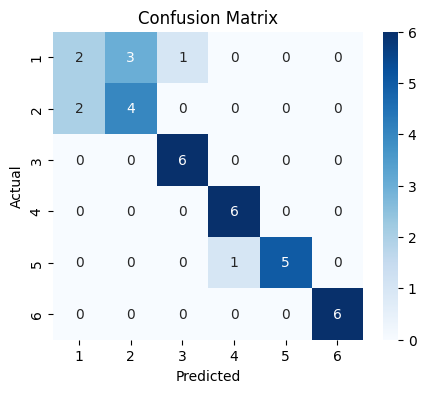

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Visualizing the decision tree using Graphviz 

In [24]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree

dot_data = export_graphviz(dt2, out_file=None, 
                           class_names=folders,
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png", cleanup=True)
graph.view("decision_tree")


'decision_tree.pdf'

### Training decision trees of varying depth:

In [25]:
models2 = []
accuracies2 = []
pred2 = []

for i,depth in enumerate(range(2,9)):
    models2.append(DecisionTreeClassifier(criterion='entropy',random_state=42, max_depth=depth))

    models2[i].fit(X_train_f, y_train)

    y_pred = models2[i].predict(X_val_f)

    accuracy = accuracy_score(y_val, y_pred)
    pred2.append(y_pred)
    accuracies2.append(accuracy)
    

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/kishan/snap/code/common/.cache/gio-modules/libgiolibproxy.so


In [26]:
models


(process:5489): Gtk-WARNING **: 21:36:48.495: Locale not supported by C library.
	Using the fallback 'C' locale.


[DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42),
 DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42),
 DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42),
 DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42),
 DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42),
 DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42),
 DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)]

In [27]:
for i,acc in enumerate(accuracies2):
    print("Depth :",i+2,", Accuracy:",accuracies2[i])

Depth : 2 , Accuracy: 0.6666666666666666
Depth : 3 , Accuracy: 0.6944444444444444
Depth : 4 , Accuracy: 0.7222222222222222
Depth : 5 , Accuracy: 0.6944444444444444
Depth : 6 , Accuracy: 0.6666666666666666
Depth : 7 , Accuracy: 0.6666666666666666
Depth : 8 , Accuracy: 0.6666666666666666


/home/kishan/snap/code/common/.cache/gio-modules/libgiolibproxy.so: cannot open shared object file: Permission denied
Failed to load module: /home/kishan/snap/code/common/.cache/gio-modules/libgiolibproxy.so


### The confusion matrices for various depths:


(evince:5489): Gtk-WARNING **: 21:36:48.546: Theme parsing error: gtk-keys.css:1:0: Failed to import: Error opening file /snap/code/149/usr/share/themes/Default/gtk-3.0/gtk-keys.css: Permission denied
Gtk-Message: 21:36:48.546: Failed to load module "canberra-gtk-module"
Gtk-Message: 21:36:48.547: Failed to load module "canberra-gtk-module"


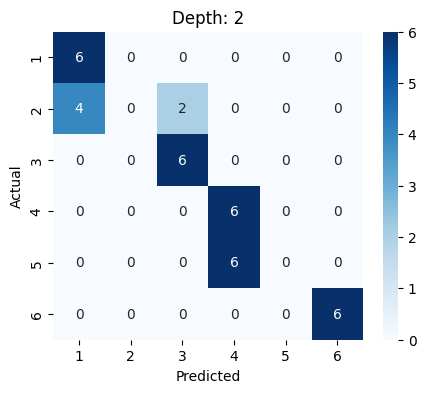

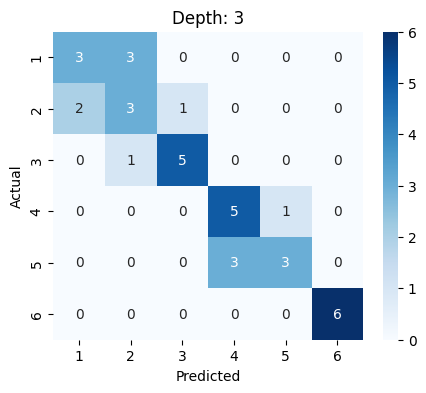

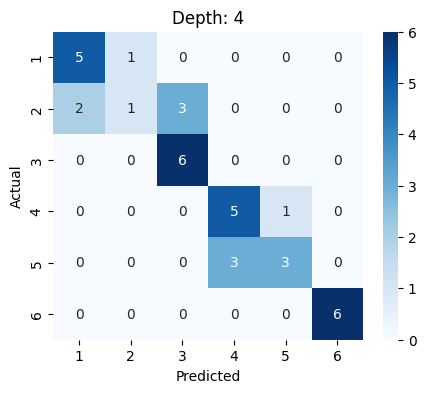

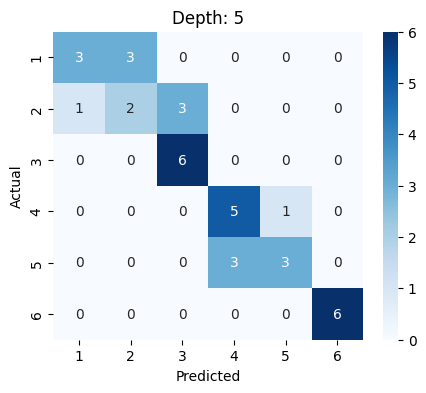

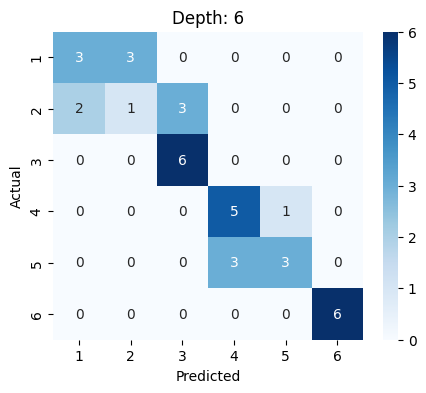

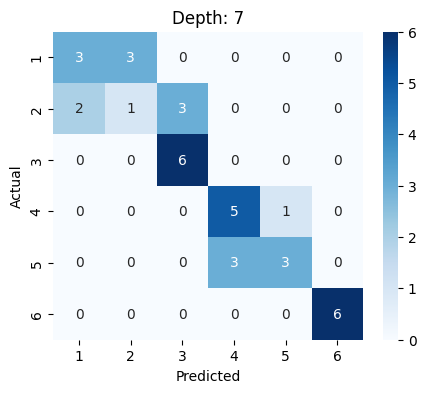

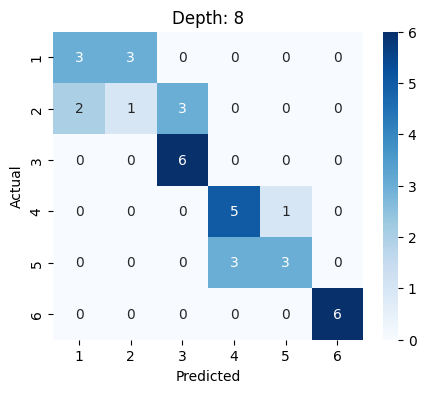

In [28]:
for i,y_pred in enumerate(pred2):

    cm = confusion_matrix(y_val, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(1, 7), yticklabels=range(1, 7))
    plt.title(f'Depth: {i+2}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

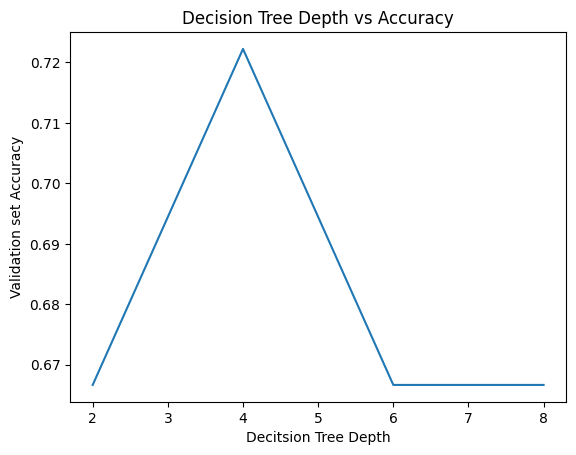

In [29]:
plt.plot(np.arange(2,9),accuracies2)
plt.xlabel("Decitsion Tree Depth")
plt.ylabel("Validation set Accuracy")
plt.title("Decision Tree Depth vs Accuracy")
plt.show()

This plot shows that the best depth is 4, because uptil that, the accuracy increases (bias decreases), but after that, the variance increases and hence the accuracy on the validation set dereases.

## Q5

### Performing PCA 

Shape of the data after PCA: (108, 2)


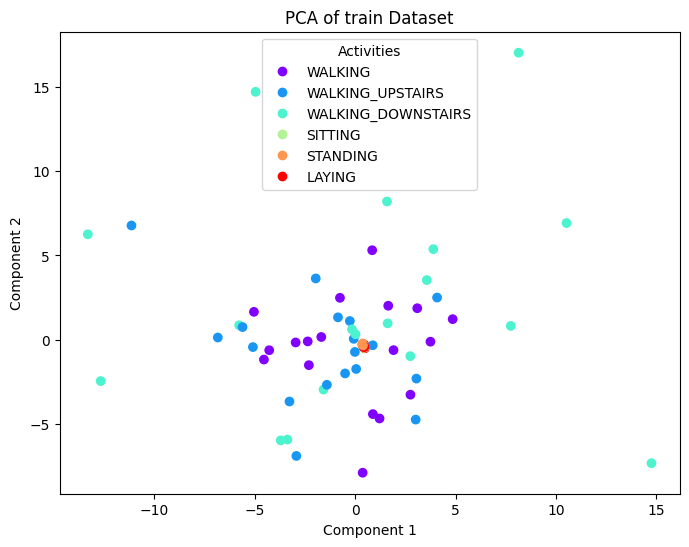

In [30]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.figure(figsize=(8, 6))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(linear_acc_train)
print("Shape of the data after PCA:",X_pca.shape)

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='rainbow')

legend_labels = [f'{activity_dict[i]}' for i in set(y_train)]
legend_elements = scatter.legend_elements()[0]
legend = plt.legend(legend_elements, legend_labels, title='Activities')

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA of train Dataset')
plt.show()


The above plot shows that static activities: sitting, standing and laying are together (almost overlapping at the same point), while the dynamic activities: walking, walking_upsairs and walking_downstairs are more spread out, but mixed with each other.

### Picking features using TSFEL

The features picked are: absolute energy, mean absolute deviation, peak to peak distance, rms, autocorrelation, variance, mean and slope

In [31]:
import tsfel
X_tsf_train = []

for i in range(len(linear_acc_train)):
    l = []
    l.append(tsfel.feature_extraction.features.abs_energy(linear_acc_train[i]))
    l.append(tsfel.feature_extraction.features.mean_abs_deviation(linear_acc_train[i]))
    l.append(tsfel.feature_extraction.features.pk_pk_distance(linear_acc_train[i]))
    l.append(tsfel.feature_extraction.features.rms(linear_acc_train[i]))
    l.append(tsfel.feature_extraction.features.autocorr(linear_acc_train[i]))
    l.append(tsfel.feature_extraction.features.calc_var(linear_acc_train[i]))
    l.append(tsfel.feature_extraction.features.calc_mean(linear_acc_train[i]))
    l.append(tsfel.feature_extraction.features.slope(linear_acc_train[i]))
    X_tsf_train.append(np.array(l))

X_tsf_train= np.array(X_tsf_train)
print("Shape of training data:",X_tsf_train.shape)

X_tsf_val = []

for i in range(len(linear_acc_val)):
    l = []
    l.append(tsfel.feature_extraction.features.abs_energy(linear_acc_val[i]))
    l.append(tsfel.feature_extraction.features.mean_abs_deviation(linear_acc_val[i]))
    l.append(tsfel.feature_extraction.features.pk_pk_distance(linear_acc_val[i]))
    l.append(tsfel.feature_extraction.features.rms(linear_acc_val[i]))
    l.append(tsfel.feature_extraction.features.autocorr(linear_acc_val[i]))
    l.append(tsfel.feature_extraction.features.calc_var(linear_acc_val[i]))
    l.append(tsfel.feature_extraction.features.calc_mean(linear_acc_val[i]))
    l.append(tsfel.feature_extraction.features.slope(linear_acc_val[i]))
    X_tsf_val.append(np.array(l))

X_tsf_val= np.array(X_tsf_val)
print("Shape of validation data:",X_tsf_val.shape)

X_tsf_test = []

for i in range(len(linear_acc_test)):
    l = []
    l.append(tsfel.feature_extraction.features.abs_energy(linear_acc_test[i]))
    l.append(tsfel.feature_extraction.features.mean_abs_deviation(linear_acc_test[i]))
    l.append(tsfel.feature_extraction.features.pk_pk_distance(linear_acc_test[i]))
    l.append(tsfel.feature_extraction.features.rms(linear_acc_test[i]))
    l.append(tsfel.feature_extraction.features.autocorr(linear_acc_test[i]))
    l.append(tsfel.feature_extraction.features.calc_var(linear_acc_test[i]))
    l.append(tsfel.feature_extraction.features.calc_mean(linear_acc_test[i]))
    l.append(tsfel.feature_extraction.features.slope(linear_acc_test[i]))
    X_tsf_test.append(np.array(l))

X_tsf_test= np.array(X_tsf_test)
print("Shape of testing data:",X_tsf_test.shape)

Shape of training data: (108, 8)
Shape of validation data: (36, 8)
Shape of testing data: (36, 8)


Shape of the data after PCA: (108, 2)


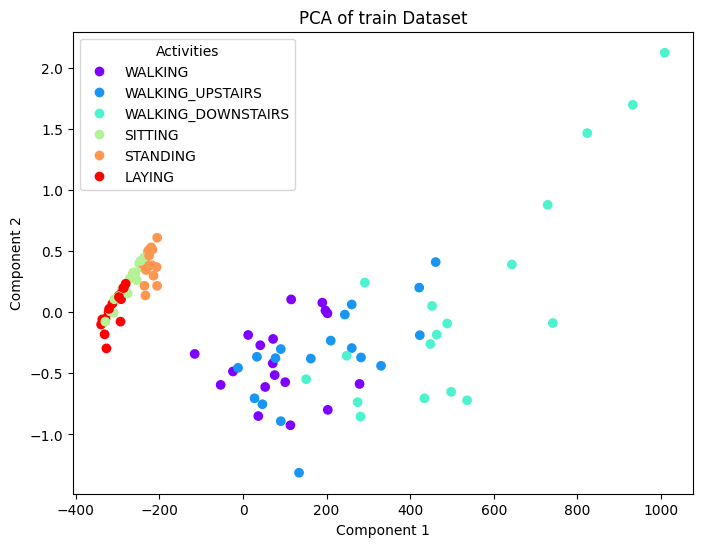

In [32]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.figure(figsize=(8,6))

pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_tsf_train)
print("Shape of the data after PCA:",X_pca_train.shape)

scatter = plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=y_train, cmap='rainbow')

legend_labels = [f'{activity_dict[i]}' for i in set(y_train)]
legend_elements = scatter.legend_elements()[0]
legend = plt.legend(legend_elements, legend_labels, title='Activities')

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA of train Dataset')
plt.show()


Yes, we can see a difference between the 2 PCA plots. In this scatterplot, the static activities are more separated from each other and from dynamic activities. The dynamic activities are also more classifyable than the previous PCA scatterplot. This is because of featurization, as the mean, variance etc. of the waveform depends upon the activity.

In [33]:
X_pca_val = pca.fit_transform(X_tsf_val)
X_pca_test = pca.fit_transform(X_tsf_test)

# Q6

### Training and testing a decision tree on this data obtained after featurization and PCA

In [51]:
dt3 = DecisionTreeClassifier(criterion='entropy',random_state=42)
dt3.fit(X_pca_train, y_train)

y_pred = dt3.predict(X_pca_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy is:",accuracy)

Accuracy is: 0.5277777777777778


### Confusion matrix

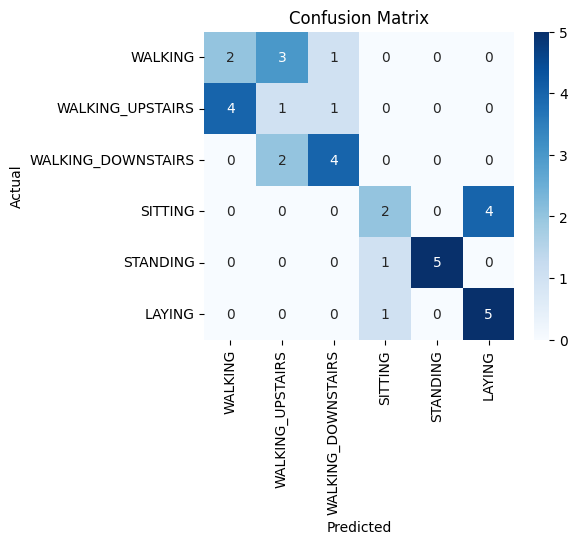

In [52]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels= [activity_dict[i] for i in range(1, 7)] , yticklabels=[activity_dict[i] for i in range(1, 7)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Visualizing the decision tree using graphviz

In [53]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree

dot_data = export_graphviz(dt3, out_file=None, 
                           class_names=folders,
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png", cleanup=True)
graph.view("decision_tree")

'decision_tree.pdf'

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/kishan/snap/code/common/.cache/gio-modules/libgiolibproxy.so

(process:108820): Gtk-WARNING **: 23:26:54.674: Locale not supported by C library.
	Using the fallback 'C' locale.
/home/kishan/snap/code/common/.cache/gio-modules/libgiolibproxy.so: cannot open shared object file: Permission denied
Failed to load module: /home/kishan/snap/code/common/.cache/gio-modules/libgiolibproxy.so

(evince:108820): Gtk-WARNING **: 23:26:54.728: Theme parsing error: gtk-keys.css:1:0: Failed to import: Error opening file /snap/code/149/usr/share/themes/Default/gtk-3.0/gtk-keys.css: Permission denied
Gtk-Message: 23:26:54.728: Failed to load module "canberra-gtk-module"
Gtk-Message: 23:26:54.729: Failed to load module "canberra-gtk-module"
/home/kishan/snap/code/common/.cache/gio-modules/libdconfsettings.so: cannot open shared object f

### Training Decision Trees of various depths

In [54]:
models3 = []
accuracies3 = []
pred3 = []

for i,depth in enumerate(range(2,9)):
    models3.append(DecisionTreeClassifier(criterion='entropy',random_state=42, max_depth=depth))

    models3[i].fit(X_pca_train, y_train)

    y_pred = models3[i].predict(X_pca_val)

    accuracy = accuracy_score(y_val, y_pred)
    pred3.append(y_pred)
    accuracies3.append(accuracy)

In [55]:
models3

[DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42),
 DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42),
 DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42),
 DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42),
 DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42),
 DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42),
 DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)]

In [56]:
for i,acc in enumerate(accuracies3):
    print("Depth :",i+2,", Accuracy:",accuracies3[i])

Depth : 2 , Accuracy: 0.5
Depth : 3 , Accuracy: 0.5555555555555556
Depth : 4 , Accuracy: 0.5555555555555556
Depth : 5 , Accuracy: 0.5277777777777778
Depth : 6 , Accuracy: 0.5277777777777778
Depth : 7 , Accuracy: 0.5277777777777778
Depth : 8 , Accuracy: 0.5277777777777778


Text(0.5, 1.0, 'Decision Tree Depth vs Accuracy')


(evince:5572): Gtk-WARNING **: 21:36:51.554: Theme parsing error: gtk-keys.css:1:0: Failed to import: Error opening file /snap/code/149/usr/share/themes/Default/gtk-3.0/gtk-keys.css: Permission denied
Gtk-Message: 21:36:51.555: Failed to load module "canberra-gtk-module"
Gtk-Message: 21:36:51.556: Failed to load module "canberra-gtk-module"


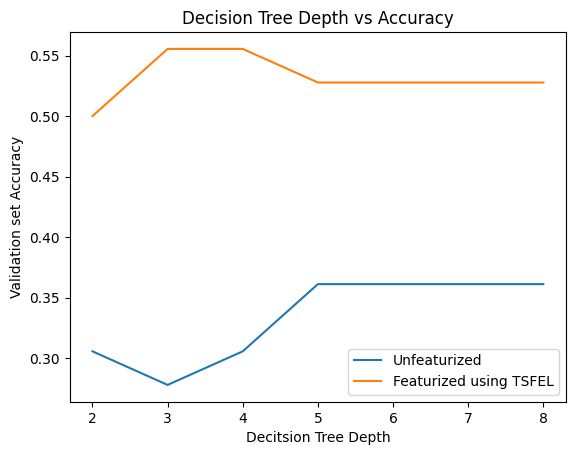

In [40]:
plt.plot(np.arange(2,9),accuracies,label="Unfeaturized")
plt.plot(np.arange(2,9),accuracies3,label="Featurized using TSFEL")
plt.xlabel("Decitsion Tree Depth")
plt.ylabel("Validation set Accuracy")
plt.legend()
plt.title("Decision Tree Depth vs Accuracy")

### Choosing the best depth

The accuracy first increases, reducing bias, then it starts decreasing, this indicates an increase in variance. The best accuracy is obtained on depth is hence chosen.

### Tesing our model

In [41]:
y_pred = models3[3].predict(X_pca_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy of our model on test data:",accuracy)

Accuracy of our model on test data: 0.6111111111111112


# Q7

To understand the activities for which the model performance is bad, we need to plot the confusion matrix.

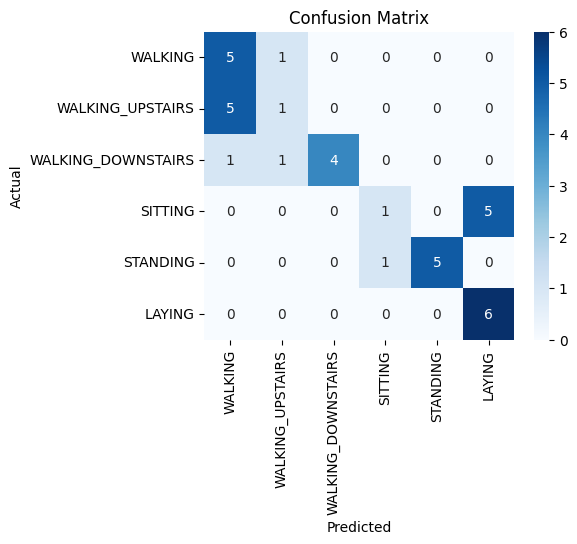

In [42]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels= [activity_dict[i] for i in range(1, 7)] , yticklabels=[activity_dict[i] for i in range(1, 7)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

We see that the model wrongly predicts sitting as laying for a large number of times. This is likely because as both of them are static activities, and we are dealing with linear acceleration, so the net linear acceleration waveforms of these activities might look very similar.

There is also some confusion within static activities and dynamic activities.

As this model is being used to predict activities, it depends on the input provided by the participant. Some participants may have not used the device (being used to record the data) properly, in proper orientation.

------------------------------------------------------------------------------------------------------------------------------

# Deployment

#### Converting the Data from .txt format to numpy array of shape (24,500,3):

Here we have 24 Datapoints, 4 of each activity. In each datapoint there are 500 timeseries points corresponding to the 3 coordinate axes resulting in the shape of the array (24,500,3). We have 2 Numpy arrays, one is of Raw data which is resampled and trimmed into 500 points and other is generated by Filtering the Raw Data.

In [43]:
X_testf = np.loadtxt("./FilteredData/X_data_test.txt")
X_testr = np.loadtxt("./RawProcessedData/X_data_test_raw.txt")
y_test_data = np.loadtxt("./RawProcessedData/y_data_test.txt")


X_testf = X_testf.reshape(24,500,3)
X_testr = X_testr.reshape(24,500,3)

#### Calculating the mean and variance of the 500 points and Creating only 6 features of mean and variance on X,Y & Z axes

We are converting the 500 points which are correspoinding to the 500 features into only six features. These features are derived from the mean and variance of these points along three coordinate axes. We are using these six features for the Deployment of the Model to recognise the activity performed by the human.

In [44]:
mean_testr_x = X_testr[:,:,0].mean(axis=1)
var_testr_x = X_testr[:,:,0].var(axis=1)

mean_testr_y = X_testr[:,:,1].mean(axis=1)
var_testr_y = X_testr[:,:,1].var(axis=1)

mean_testr_z = X_testr[:,:,2].mean(axis=1)
var_testr_z = X_testr[:,:,2].var(axis=1)

test_r = np.stack((mean_testr_x,mean_testr_y,mean_testr_z,var_testr_x,var_testr_y,var_testr_z),axis=1)
print("Raw Data Array Shape: ",test_r.shape)

mean_testf_x = X_testf[:,:,0].mean(axis=1)
var_testf_x = X_testf[:,:,0].var(axis=1)

mean_testf_y = X_testf[:,:,1].mean(axis=1)
var_testf_y = X_testf[:,:,1].var(axis=1)

mean_testf_z = X_testf[:,:,2].mean(axis=1)
var_testf_z = X_testf[:,:,2].var(axis=1)

test_f = np.stack((mean_testf_x,mean_testf_y,mean_testf_z,var_testf_x,var_testf_y,var_testf_z),axis=1)
print("Filtered Data Array Shape: ",test_f.shape)


Raw Data Array Shape:  (24, 6)
Filtered Data Array Shape:  (24, 6)


##### Labels of Recorded Data

In [45]:
print("Labels of the Recorded Data: ",y_test_data)

Labels of the Recorded Data:  [5. 4. 1. 2. 5. 1. 5. 4. 6. 5. 2. 4. 2. 4. 3. 1. 3. 6. 6. 1. 3. 3. 2. 6.]


### Prediction

1. First, we predict on raw data, ie; data collected from the phone and resampled to 500 samples.

2. Next, we applied Butterworth filter (as mentioned in the UCI Dataset, as this was done on the collected data and this means that our model was trained on data that had been filtered)

### Predicting the Labels on the Recorded Raw Data using the Trained Model

The Numpy array $test\_r$ corresponds to the Raw Data. We are prediciting the labels of Testing Raw Data and printing the Model's Accuracy.

In [46]:
y_pred_r = dt2.predict(test_r)

print("Accuracy of the Model on the Raw Data is:",accuracy_score(y_pred_r,y_test_data))

Accuracy of the Model on the Raw Data is: 0.625


#### Confusion Matrix for the Prediction of Raw Data

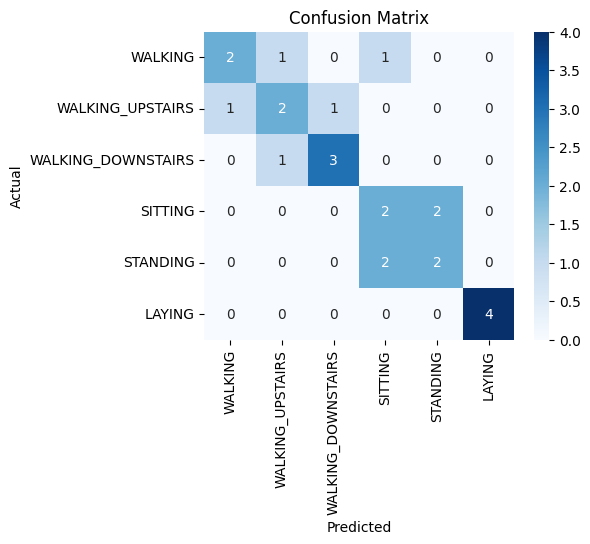

In [47]:
cm = confusion_matrix(y_test_data, y_pred_r)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels= [activity_dict[i] for i in range(1, 7)] , yticklabels=[activity_dict[i] for i in range(1, 7)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The Confusion Matrix above suggests that how well the Model is able to predict different activities into their classes. 
    
On observing the matrix we can say that the Model is predicting the activity $Laying$ accurately, and this is because the Gravitational Force along Z-axis changes drastically due to change in orientation of the Mobile Phone while collecting data.

There is a confusion between activities $Sitting$ and $Standing$ because in both are stationary activities and the orientation of Mobile Phone is also same in both the cases, which makes it more difficult for the Model to predict whether the person is sitting or standing.

At last, there is a slight confusion in moving activities such as $Walking, Walking Upstairs$ and $Walking Downstairs$. The reason behind this is that the Gravitational Force is oscillating between some value along $X$ or $Y$ axis which makes it difficult to predict correctly.

### Predicting the Labels of the Filtered Data using the Trained Model

In [48]:
y_pred_f = dt2.predict(test_f)

print("accuracy:",accuracy_score(y_pred_f,y_test_data))

accuracy: 0.625


#### Confusion Matrix for Prediction of the Filtered Data

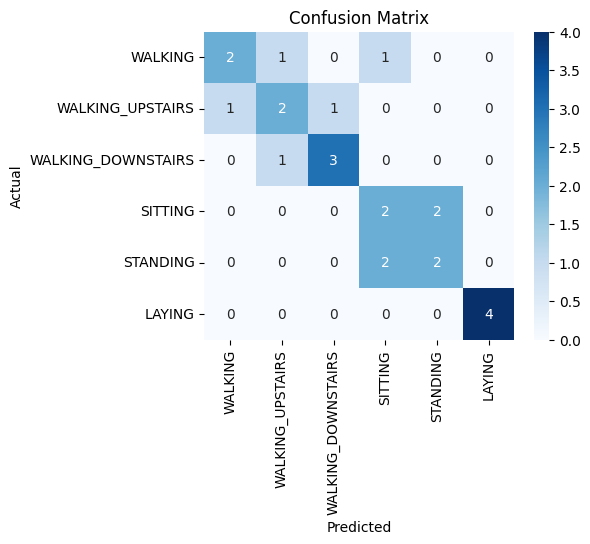

In [49]:
cm = confusion_matrix(y_test_data, y_pred_f)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels= [activity_dict[i] for i in range(1, 7)] , yticklabels=[activity_dict[i] for i in range(1, 7)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Even after filtering the data, there is not much difference in the Confusion Matrix. This suggests that there is very less effect of filtering data on predicting the activities.